In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read dataset

In [5]:
#read data set
data=pd.read_csv('/content/bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5.0,may,1467.0,1,-1.0,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5.0,may,1389.0,1,-1.0,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5.0,may,579.0,1,-1.0,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5.0,may,673.0,2,-1.0,0,unknown,yes


In [6]:
data.shape

(10861, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10861 entries, 0 to 10860
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10861 non-null  int64  
 1   job        10846 non-null  object 
 2   marital    10861 non-null  object 
 3   education  10852 non-null  object 
 4   default    10861 non-null  object 
 5   balance    10855 non-null  float64
 6   housing    10861 non-null  object 
 7   loan       10858 non-null  object 
 8   contact    10850 non-null  object 
 9   day        10860 non-null  float64
 10  month      10861 non-null  object 
 11  duration   10841 non-null  float64
 12  campaign   10861 non-null  int64  
 13  pdays      10842 non-null  float64
 14  previous   10861 non-null  int64  
 15  poutcome   10861 non-null  object 
 16  y          10861 non-null  object 
dtypes: float64(4), int64(3), object(10)
memory usage: 1.4+ MB


In [8]:
data.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,float64
housing,object
loan,object
contact,object
day,float64


In [9]:
data.isnull().sum()

,0
age,0
job,15
marital,0
education,9
default,0
balance,6
housing,0
loan,3
contact,11
day,1


Histogram

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

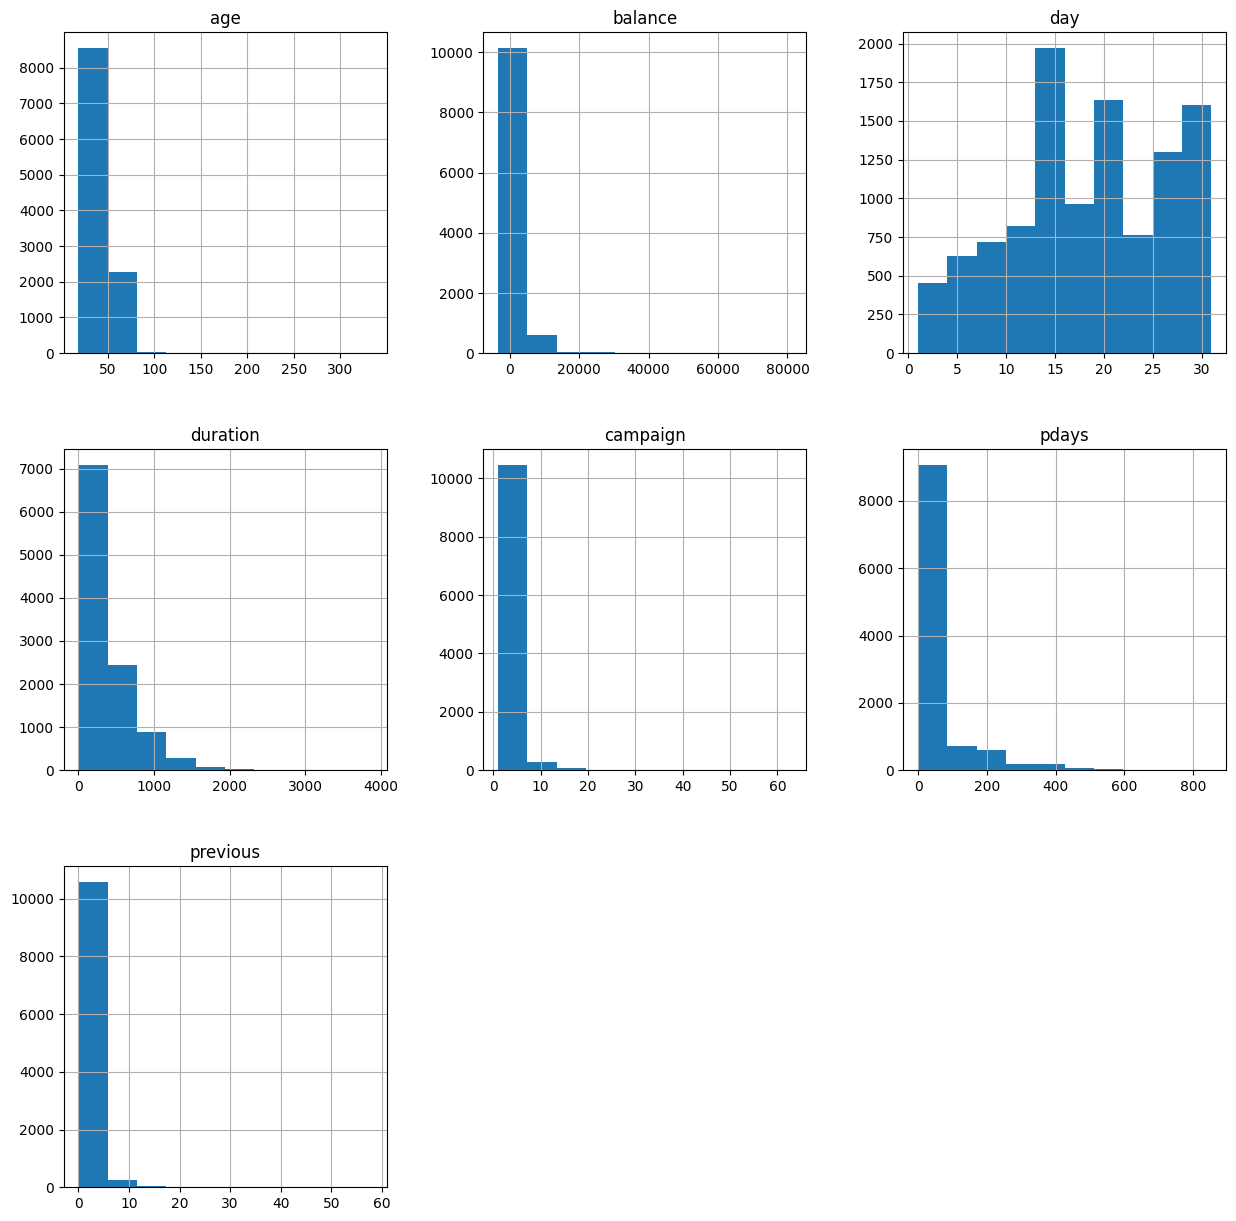

In [10]:
data.hist(figsize=(15,15))

In [11]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10861.000000,10855.000000,10860.000000,10841.000000,10861.000000,10842.000000,10861.000000
mean,40.323727,1457.746476,17.887937,386.267687,2.442593,33.002859,0.569929
std,11.969443,3077.475009,7.846315,345.403995,2.662568,90.004568,1.875257
min,18.000000,-3372.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,32.000000,107.000000,13.000000,156.000000,1.000000,-1.000000,0.000000
50%,38.000000,524.000000,18.000000,268.000000,2.000000,-1.000000,0.000000
75%,47.000000,1633.000000,26.000000,507.000000,3.000000,-1.000000,0.000000
max,334.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [12]:
#filling null values
data['job']=data['job'].fillna(data['job'].mode()[0])
data['education']=data['education'].fillna(data['education'].mode()[0])
data['loan']=data['loan'].fillna(data['loan'].mode()[0])
data['contact']=data['contact'].fillna(data['contact'].mode()[0])


In [13]:
data['balance']=data['balance'].fillna(data['balance'].median())
data['day']=data['day'].fillna(data['day'].mean())
data['duration']=data['duration'].fillna(data['duration'].median())
data['pdays']=data['pdays'].fillna(data['pdays'].median())

In [14]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


Boxplot

<Axes: >

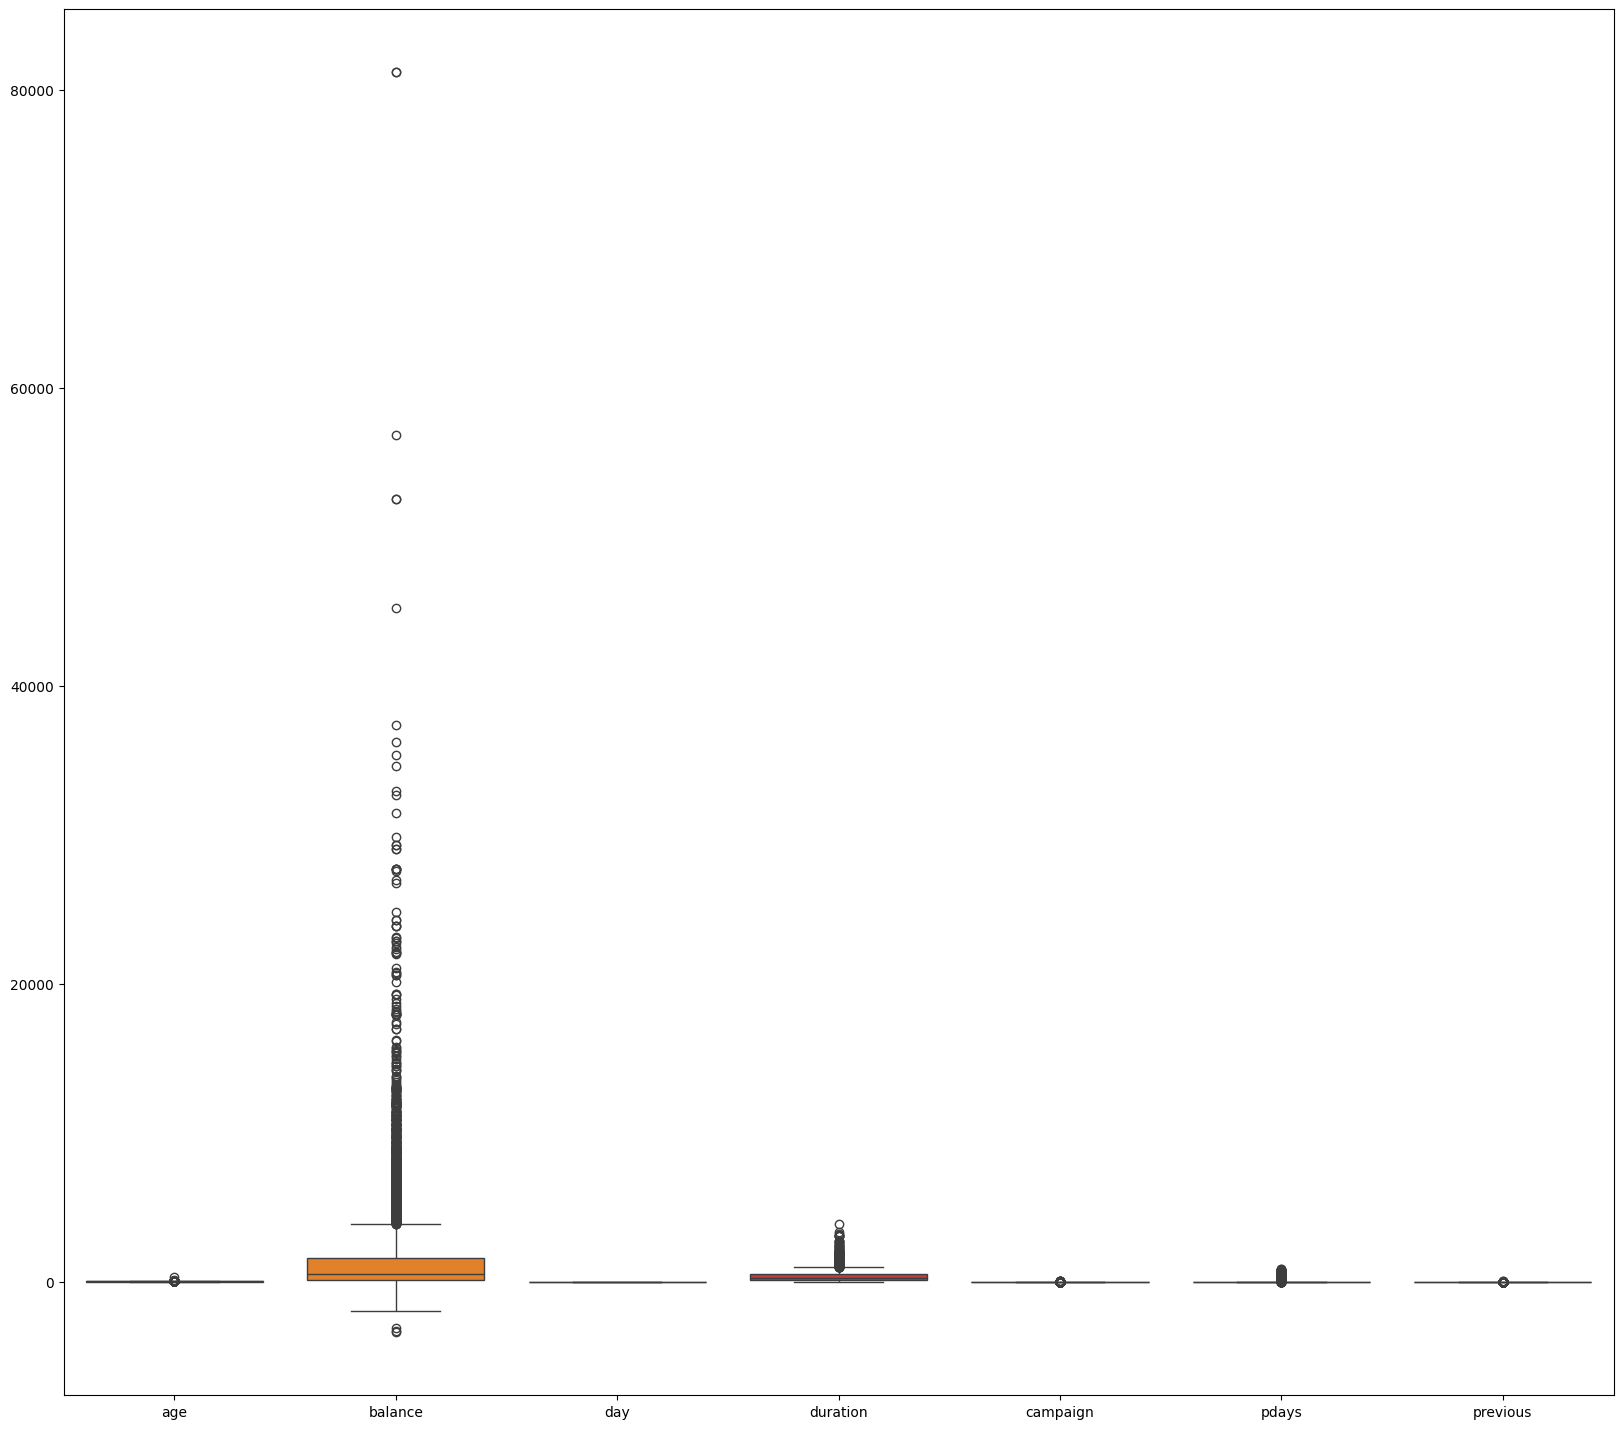

In [15]:
#boxplot
plt.figure(figsize=(20,18))
sns.boxplot(data)

In [16]:
data.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5.0,may,1042.0,1,-1.0,0,unknown,yes


In [17]:
#removing outliers
out=data[['age','balance','duration','campaign','pdays','previous']]
out

,age,balance,duration,campaign,pdays,previous
0,59,2343.0,1042.0,1,-1.0,0
1,56,45.0,1467.0,1,-1.0,0
2,41,1270.0,1389.0,1,-1.0,0
3,55,2476.0,579.0,1,-1.0,0
4,54,184.0,673.0,2,-1.0,0
...,...,...,...,...,...,...
10856,45,413.0,65.0,1,-1.0,0
10857,51,4178.0,556.0,1,-1.0,0
10858,40,2147.0,115.0,1,-1.0,0
10859,43,1096.0,180.0,1,-1.0,0


In [18]:
for col in out.columns:
    q1 = out[col].quantile(0.25)
    q3 = out[col].quantile(0.75)
    iqr = q3 - q1

    # Define lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    out[col] = out[col].clip(lower=lower_bound, upper=upper_bound)


<ipython-input-18-1254b371f610>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out[col] = out[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-18-1254b371f610>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out[col] = out[col].clip(lower=lower_bound, upper=upper_bound)
<ipython-input-18-1254b371f610>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<Axes: >

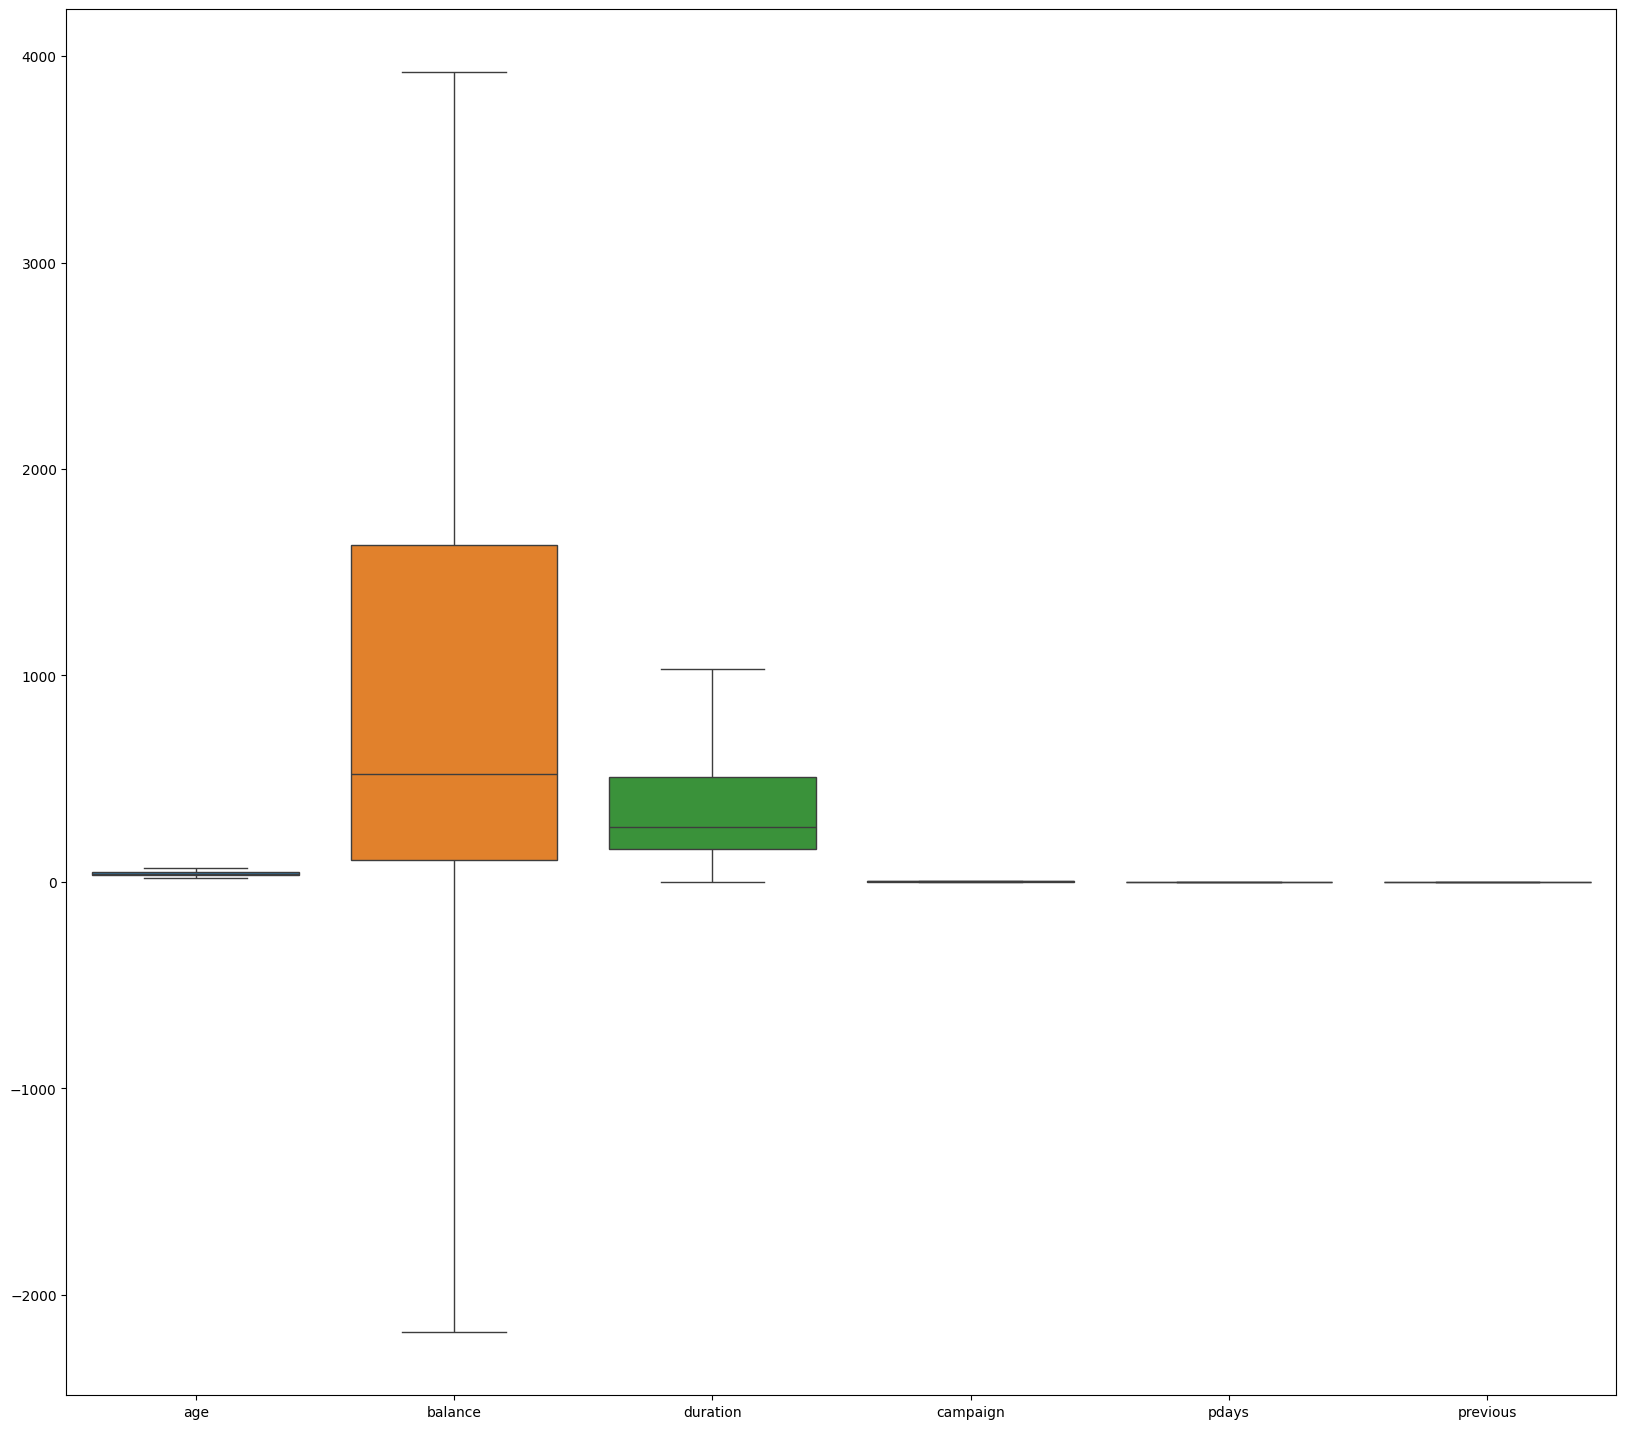

In [19]:
plt.figure(figsize=(20,18))
sns.boxplot(out)


In [20]:
numerical=data.select_dtypes(include=['int64','float64']).columns
categorical=data.select_dtypes(include='object').columns
numerical

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

Correlation


In [21]:
# Select the numerical columns from the DataFrame
numerical_df = data[numerical]

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Display the correlation matrix
print(correlation_matrix)

               age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.110365 -0.072387  0.021498 -0.002604  0.057043  0.059366
balance   0.110365  1.000000 -0.031638  0.029100 -0.019899  0.050441  0.049968
day      -0.072387 -0.031638  1.000000 -0.129697  0.069109 -0.149337 -0.134389
duration  0.021498  0.029100 -0.129697  1.000000 -0.002284  0.046341  0.023799
campaign -0.002604 -0.019899  0.069109 -0.002284  1.000000 -0.089002 -0.059432
pdays     0.057043  0.050441 -0.149337  0.046341 -0.089002  1.000000  0.521290
previous  0.059366  0.049968 -0.134389  0.023799 -0.059432  0.521290  1.000000


Heatmap

<Axes: >

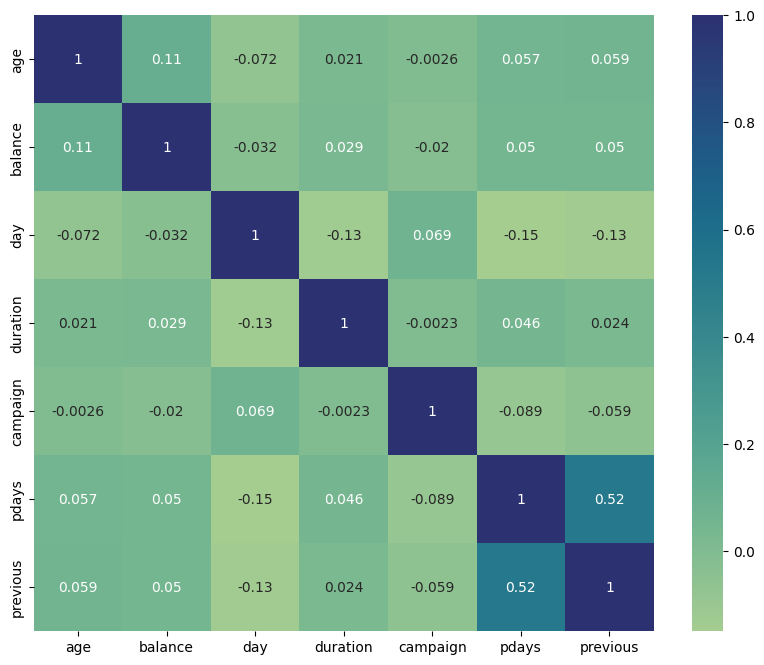

In [22]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,cmap='crest',annot=True)

In [23]:
#categorical columns
categorical

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [24]:
data.job.value_counts()

,count
job,
blue-collar,2569
management,2134
technician,1718
admin.,1317
services,997
retired,664
student,326
self-employed,320
unemployed,314


In [25]:
data.marital.value_counts()

,count
marital,
married,6169
single,3461
divorced,1231


In [26]:
data.education.value_counts()

,count
education,
secondary,5729
tertiary,3081
primary,1565
unknown,486


In [27]:
data.default.value_counts()

,count
default,
no,10691
yes,170


In [28]:
data.housing.value_counts()

,count
housing,
yes,6954
no,3907


In [29]:
data.loan.value_counts()

,count
loan,
no,9508
yes,1353


In [30]:
data.contact.value_counts()

,count
contact,
unknown,6102
cellular,4369
telephone,390


In [31]:
data.month.value_counts()

,count
month,
may,6497
aug,688
jul,627
apr,577
jun,546
feb,441
nov,403
oct,323
sep,269


In [32]:
data.poutcome.value_counts()

,count
poutcome,
unknown,8958
success,978
failure,618
other,307


In [33]:
data.y.value_counts()

,count
y,
no,5572
yes,5289


In [34]:
data['marital']=data['marital'].map({'divorced':2,'married':1,'single':0})
data['default']=data['default'].map({'yes':1,'no':0})
data['housing']=data['housing'].map({'yes':1,'no':0})
data['loan']=data['loan'].map({'yes':1,'no':0})
data['education']=data['education'].map({'primary':0,'secondary':1,'tertiary':2,'unknown':3})
data['contact']=data['contact'].map({'unknown':0,'cellular':1,'telephone':2})
data['poutcome']=data['poutcome'].map({'unknown':0,'failure':1,'success':2,'other':3})
data['y']=data['y'].map({'yes':1,'no':0})

In [35]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,admin.,1,1,0,2343.0,1,0,0,5.0,may,1042.0,1,-1.0,0,0,1
1,56,admin.,1,1,0,45.0,0,0,0,5.0,may,1467.0,1,-1.0,0,0,1
2,41,technician,1,1,0,1270.0,1,0,0,5.0,may,1389.0,1,-1.0,0,0,1
3,55,services,1,1,0,2476.0,1,0,0,5.0,may,579.0,1,-1.0,0,0,1
4,54,admin.,1,2,0,184.0,0,0,0,5.0,may,673.0,2,-1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,housemaid,2,0,0,413.0,1,0,0,30.0,may,65.0,1,-1.0,0,0,0
10857,51,admin.,1,1,0,4178.0,1,0,0,30.0,may,556.0,1,-1.0,0,0,0
10858,40,management,1,2,0,2147.0,1,0,0,30.0,may,115.0,1,-1.0,0,0,0
10859,43,blue-collar,1,1,0,1096.0,0,1,0,30.0,may,180.0,1,-1.0,0,0,0


Encoding

In [36]:
#label encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['job']=le.fit_transform(data['job'])
data['month']=le.fit_transform(data['month'])

In [37]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,59,0,1,1,0,2343.0,1,0,0,5.0,8,1042.0,1,-1.0,0,0,1
1,56,0,1,1,0,45.0,0,0,0,5.0,8,1467.0,1,-1.0,0,0,1
2,41,9,1,1,0,1270.0,1,0,0,5.0,8,1389.0,1,-1.0,0,0,1
3,55,7,1,1,0,2476.0,1,0,0,5.0,8,579.0,1,-1.0,0,0,1
4,54,0,1,2,0,184.0,0,0,0,5.0,8,673.0,2,-1.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10856,45,3,2,0,0,413.0,1,0,0,30.0,8,65.0,1,-1.0,0,0,0
10857,51,0,1,1,0,4178.0,1,0,0,30.0,8,556.0,1,-1.0,0,0,0
10858,40,4,1,2,0,2147.0,1,0,0,30.0,8,115.0,1,-1.0,0,0,0
10859,43,1,1,1,0,1096.0,0,1,0,30.0,8,180.0,1,-1.0,0,0,0


In [38]:
data.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.010586,0.420880,-0.090064,-0.029812,0.110365,-0.162986,-0.048685,0.177516,-0.072387,-0.060262,0.021498,-0.002604,0.057043,0.059366,0.078656,0.115780
job,-0.010586,1.000000,-0.073429,0.170702,-0.027083,0.041307,-0.145722,-0.030632,0.130908,-0.017407,-0.097748,0.030805,-0.031284,0.059649,0.055731,0.073949,0.133213
marital,0.420880,-0.073429,1.000000,-0.128777,0.009391,-0.005509,0.046953,0.049923,-0.044704,0.012163,0.033622,-0.005356,0.008584,-0.026306,-0.022260,-0.033539,-0.060201
education,-0.090064,0.170702,-0.128777,1.000000,-0.004925,0.071457,-0.162343,-0.052032,0.158759,-0.043320,-0.108161,0.017085,-0.010598,0.080386,0.064304,0.108042,0.172557
default,-0.029812,-0.027083,0.009391,-0.004925,1.000000,-0.069947,0.032695,0.051263,-0.055752,0.014470,0.017031,-0.008715,0.004112,-0.033086,-0.035953,-0.044986,-0.045686
balance,0.110365,0.041307,-0.005509,0.071457,-0.069947,1.000000,-0.108333,-0.080695,0.128811,-0.031638,-0.052868,0.029100,-0.019899,0.050441,0.049968,0.083165,0.109899
housing,-0.162986,-0.145722,0.046953,-0.162343,0.032695,-0.108333,1.000000,0.121831,-0.560881,0.191375,0.353236,-0.101978,0.064867,-0.176632,-0.169353,-0.283277,-0.557091
loan,-0.048685,-0.030632,0.049923,-0.052032,0.051263,-0.080695,0.121831,1.000000,-0.099103,0.061856,0.067814,0.019890,-0.004590,-0.056189,-0.051759,-0.087084,-0.097545
contact,0.177516,0.130908,-0.044704,0.158759,-0.055752,0.128811,-0.560881,-0.099103,1.000000,-0.293774,-0.465459,0.285604,-0.099463,0.391351,0.318108,0.446292,0.858660
day,-0.072387,-0.017407,0.012163,-0.043320,0.014470,-0.031638,0.191375,0.061856,-0.293774,1.000000,0.147342,-0.129697,0.069109,-0.149337,-0.134389,-0.161616,-0.338696


<Axes: >

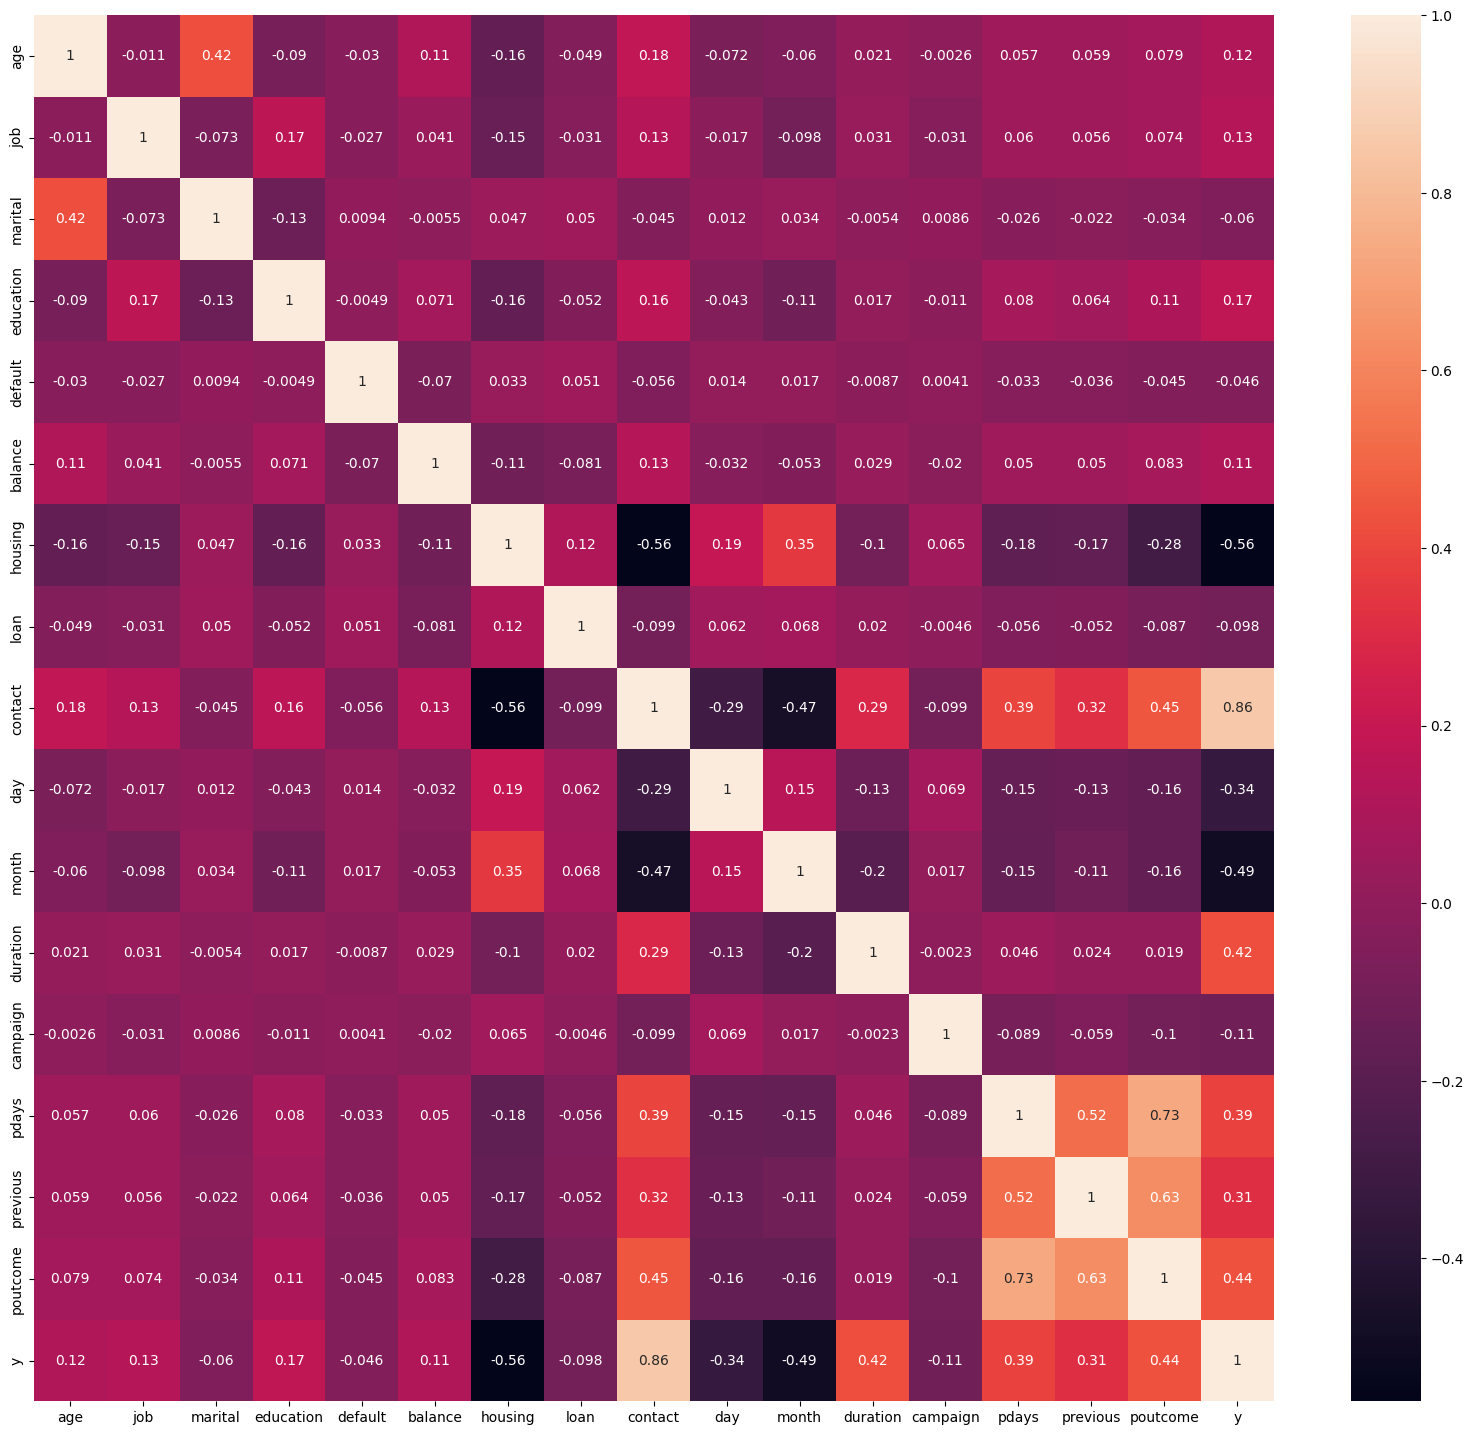

In [39]:
plt.figure(figsize=(20,18))
sns.heatmap(data.corr(),annot=True)

In [40]:
data.drop(['day','pdays','previous'],axis=1,inplace=True)

In [41]:
data.shape

(10861, 14)

Feature Selection

In [42]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression
X = data.drop('y', axis=1)  # Features
y = data['y']  # Target variable

# Use SelectKBest to select top features, use mutual_info_regression for continuous target
best_features = SelectKBest(score_func=mutual_info_regression, k='all') # Change score function
fit = best_features.fit(X, y)

# Get scores for each feature
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat scores with column names
feature_scores = pd.concat([dfcolumns, dfscores], axis=1)
feature_scores.columns = ['Feature','Score']  # Naming the dataframe columns
print(feature_scores.sort_values(by='Score', ascending=False))

      Feature     Score
8     contact  0.520563
9       month  0.451223
6     housing  0.176391
12   poutcome  0.130525
10   duration  0.127803
5     balance  0.057436
1         job  0.044639
0         age  0.040059
11   campaign  0.015479
3   education  0.014835
7        loan  0.007156
2     marital  0.004548
4     default  0.000000


In [43]:
data.drop(['marital','default'],axis=1,inplace=True)

In [44]:
data.shape

(10861, 12)

Define x,y

In [45]:
#defining x,y
x=data.drop('y',axis=1)
y=data['y']

In [46]:
x

,age,job,education,balance,housing,loan,contact,month,duration,campaign,poutcome
0,59,0,1,2343.0,1,0,0,8,1042.0,1,0
1,56,0,1,45.0,0,0,0,8,1467.0,1,0
2,41,9,1,1270.0,1,0,0,8,1389.0,1,0
3,55,7,1,2476.0,1,0,0,8,579.0,1,0
4,54,0,2,184.0,0,0,0,8,673.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10856,45,3,0,413.0,1,0,0,8,65.0,1,0
10857,51,0,1,4178.0,1,0,0,8,556.0,1,0
10858,40,4,2,2147.0,1,0,0,8,115.0,1,0
10859,43,1,1,1096.0,0,1,0,8,180.0,1,0


In [47]:
y

,y
0,1
1,1
2,1
3,1
4,1
...,...
10856,0
10857,0
10858,0
10859,0


In [48]:
x

,age,job,education,balance,housing,loan,contact,month,duration,campaign,poutcome
0,59,0,1,2343.0,1,0,0,8,1042.0,1,0
1,56,0,1,45.0,0,0,0,8,1467.0,1,0
2,41,9,1,1270.0,1,0,0,8,1389.0,1,0
3,55,7,1,2476.0,1,0,0,8,579.0,1,0
4,54,0,2,184.0,0,0,0,8,673.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10856,45,3,0,413.0,1,0,0,8,65.0,1,0
10857,51,0,1,4178.0,1,0,0,8,556.0,1,0
10858,40,4,2,2147.0,1,0,0,8,115.0,1,0
10859,43,1,1,1096.0,0,1,0,8,180.0,1,0


Split data to train and test

In [49]:
#train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [50]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

Models

In [51]:
#decission tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [52]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.975609756097561


In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)


RandomForestClassifier()

In [54]:
y_pred=dt.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.975609756097561


Hyperparametric Tuning

In [55]:
# Define the parameter grid for RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the RandomForestClassifier model
model = RandomForestClassifier(random_state=42)

# GridSearchCV for best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluate the tuned model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Tuned Model Accuracy: {accuracy:.2f}')

Best Hyperparameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Model Accuracy: 0.98


In [56]:
x

,age,job,education,balance,housing,loan,contact,month,duration,campaign,poutcome
0,59,0,1,2343.0,1,0,0,8,1042.0,1,0
1,56,0,1,45.0,0,0,0,8,1467.0,1,0
2,41,9,1,1270.0,1,0,0,8,1389.0,1,0
3,55,7,1,2476.0,1,0,0,8,579.0,1,0
4,54,0,2,184.0,0,0,0,8,673.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
10856,45,3,0,413.0,1,0,0,8,65.0,1,0
10857,51,0,1,4178.0,1,0,0,8,556.0,1,0
10858,40,4,2,2147.0,1,0,0,8,115.0,1,0
10859,43,1,1,1096.0,0,1,0,8,180.0,1,0


Predicting for new values

In [57]:
import pandas as pd

# Assuming you have a trained model named `model` and have already performed the necessary preprocessing
new_data = pd.DataFrame({
    'age': [59],
    'job': [0],
    'education': [1],
    'balance': [2343],
    'housing': [1],
    'loan': [0],
    'contact': [0],
    'month': [8],
    'duration': [1042],
    'campaign': [1],
    'poutcome': [0]
})

# Predict probabilities for both classes (0 and 1)
probabilities = rf.predict_proba(new_data)

# Display probabilities
print(f"Probability of class 0: {probabilities[0][0]}")
print(f"Probability of class 1: {probabilities[0][1]}")

# Predict the class (0 or 1) with the highest probability
predicted_class = rf.predict(new_data)

print(f"Predicted class: {predicted_class[0]}")


Probability of class 0: 0.07
Probability of class 1: 0.93
Predicted class: 1


In [58]:
import pandas as pd

# Assuming you have a trained model named `model` and have already performed the necessary preprocessing
new_data = pd.DataFrame({
    'age': [45],
    'job': [3],
    'education': [0],
    'balance': [413],
    'housing': [1],
    'loan': [0],
    'contact': [0],
    'month': [8],
    'duration': [65],
    'campaign': [1],
    'poutcome': [0]

})

# Predict probabilities for both classes (0 and 1)
probabilities = rf.predict_proba(new_data)

# Display probabilities
print(f"Probability of class 0: {probabilities[0][0]}")
print(f"Probability of class 1: {probabilities[0][1]}")

# Predict the class (0 or 1) with the highest probability
predicted_class = rf.predict(new_data)

print(f"Predicted class: {predicted_class[0]}")


Probability of class 0: 1.0
Probability of class 1: 0.0
Predicted class: 0
